# Modellering av populasjoner

Vi skal nå se på modellering av populasjoner med utgangspunkt i tre modeller som er basert på differensiallikninger. Disse skal vi så løse med Eulers metode. Følgende mål er viktige for å forstå modelleringsprosessen:

- Drøfte modellens styrker og begrensninger.
- Forstå og drøfte koeffisientenes betydning i en modell.
- Forstå, utlede og bruke Eulers metode.
- Tolke resultatene en får med Eulers metode.

Dette skal vi øve oss på, slik at det avsluttende modelleringsprosjektet deres blir så godt som mulig!

Vi skal utforske tre modeller for populasjonsdynamikk her. De tar utgangspunkt i følgende kriterier:

1. Uendelig ressurser.
2. Endelige ressurser: Bæreevne.
3. Rovdyr-bytte-forhold.

## Modell 1: Ubegrensa vekst

<img src="https://i.ytimg.com/vi/k7PXL-khy4c/maxresdefault.jpg",width=500,height=500>

Vi slipper ut 100 kaniner på øde øy. Noen elever drar til øya og registrerer hvordan kaninene formerer seg. Ved å ta omfattende målinger hver måned, finner de ut at populasjoner av kaniner øker med 5 % i måneden.

1. Forklar hvorfor vi kan bruke modellen $K'(t) = k\cdot K(t)$, der $k = 0.10$.
Ettersom endringen av populasjonen over (t) tid vil være populasjonen i en måned multiplisert med vekstraten til kaninene. 

2. Hvilken initalbetingelse har vi?
Man trenger vekstraten til kaninene, samt start populasjonen. 

3. Løs difflikninga ovenfor med Eulers metode. Tegn grafen til _K_.
Nedenfor

4. Beskriv utviklinga med ord.
En gradvis større og større vekst i antall kaniner, men prosentvis er veksten konstant. 

5. Hva skjer hvis vi begynner med 2, 5 eller 200 kaniner? Hvordan forandrer kurven seg.
Kurven forandrer seg ikke stort, kun tallene på aksene. Dette er fordi vekstraten er fremdeles den samme, tiltross for hvor mange kaniner det er (med unntak av 0 kaniner såklart). Ser at dersom det er 1 kanin, er det fremdeles en vekst. Dette er kun mulig om kaninen er drektig når den blir satt ut. Dette tar ikke modellen hensyn til. 

6. Hva betyr egentlig $k$? Hva slags verdi av $k$ vil være realistisk (søk på internett).
k betyr hvor stor økningen av kaninpopulasjonen er på. 0.5 vil tilsvare at populasjonen øker med 50%. 
http://www.petefalzone.com/handouts/exp-growth-rabbits-australia.pdf
Et sted rundt 0.2 kan være rimelig. Dette er jo såklart basert på en kanin populasjon som lever på en øy med rovdyr og andre indirekte faktorer. Så 0.3 eller kanskje 0.4 kan være mer nøyaktig for en populasjon med ubegrenset vekst. 

7. Hva skjer hvis populasjonen øker med 10 % isteden? Hva med 50 %?
Populasjonen vil øke mye raskere med 50% enn med 10%. En viktig ting å ha i bakhodet er at med en 50% økning havner populasjonen fort over bæreevnen. f.eks. kan det hende populasjonen spiser opp alt av mat. En vekst på 10% vil føre til at overgangen ikke blir like hard. Det kan hende mye av maten blir borte, men at det fremdeles er litt igjen slik at ikke alle kaninene sulter og dør. 

8. Forandrer noe seg hvis vi angir tida i år istedenfor måneder? Hva med $k$?
Forskjellen er at grafen blir mye mer "firkantet", i tillegg til at veksten er mye tregere, siden populasjonen øker med 10% hvert år fremfor hver måned. 

9. Kunne du funnet et funksjonsuttrykk for _K_? Bruk grafen som hint.
Ja, en eksponentiel funksjon kunne ha beskrevet populasjonsveksten. 
f.eks:
f(x)= 100*0,1^x, der x er antall måneder. 


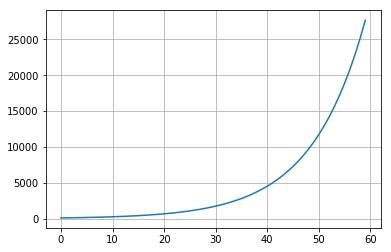

In [20]:
from pylab import*
#Definerer variablene
N = 12*5      #Tiden i måneder
dt = 1         #Antall måneder mellom hver "måling"
k = 0.1        #Vekstfaktoren für die Kaninchen


#Lager drei matriser
tid = zeros(N)     #Matrise for tiden, altså hvilken måned antallet er i
pop = zeros(N)     #Matrise for populasjonen
popder = zeros(N)  #Matrise for den deriverte av populasjonen


tid[0]= 0   #Setter at start tiden er 0 måneder for første måling
pop[0]= 100 #Starter med 100 kaniner i starten



for i in range(N-1):
    popder[i] = k*pop[i]          #Den deriverte for en måned vil være populasjonen multiplisert med veksten
    pop[i+1] = pop[i] + popder[i]*dt   #Populasjonen i neste måned er pop i forrige måned + endringen i populasjon * tidsrommet mellom 
    tid[i+1] = tid[i] + dt       #Tiden for neste måling vil være tiden på forrige måling + tiden mellom hver måling
    
plot(tid, pop)   #Plotter inn tid og populasjon i en graf
title = ("Kaninchen Populasjon")
xlabel = ("Tid (måned)")
ylabel = ('antall kaniner')
grid(True)     #Fikk feil melding for 'on', så bruker True isteden

## Modell 2: Vekst med bæreevne

<img src="https://no.vwr.com/no.vwr.com/no_NO/images/segment_microbiology.jpg",width=500,height=500>

Vi har 5000 bakterier i en petriskål med agar. Veksten til bakteriene er proposjonal med antall bakterier til enhver tid. En biolog finner ut at populasjonen stabiliserer seg etter hvert rundt 50000 bakterier.

La $B(t)$ være antall bakterier i beholderen etter $t$ timer.

1. Hva kan vi si om $B(0)$?
Vi vet at B(0) = 5000, og at stigningstallet er 5000, ettersom stigningstallet er proporsjonalt med antall bakterier.

2. Vi kaller bæreevnen $b$. Hva menes med bæreevne? Hvilke biologiske faktorer bestemmer denne?
Bæreevne er evnen omgivelsene og populasjonen har til å holde på populasjonen. En populasjon kan ikke leve over bæreevnen over en lengre tidsperiode. Faktorer som bestemmer bæreevnen er typisk rovdyr, tilgang til mat, spredning av sykdom og plass. 
f.eks. hvis populasjonen til lemen vokser, blir det mer mat til rovdyrene slik at populasjonen deres også øker. Detter fører til færre lemen, som igjen fører til færre rovdyr. Her er rovdyrene en faktor for bæreevnen til lemen populasjone, og visa versa. 

3. Forklar at en gyldig modell kan gis ved: $B′(t) = k \cdot B(t)\cdot (1−B(t)/(b)$
Modellen forklarer at endringen i en populasjon vil være populasjonen * vekstraten. Dette vil føre til at populasjonen vokser utenfor bæreevnen. Derfor multipliserer man med 1 - populasjonen delt på bæreevnen. Dersom f.eks populasjonen er laver enn bæreevnen vil endringen i populasjonen være positiv. Derimot hvis populasjonen er akkurat på bæreevnen vil det ikke være noen endrin: blabla*0 = 0
Dersom populasjonen er større en bæreevnen vil 1 - populasjon/b være negativ. Altså blir populasjonen mindre. 

4. Forklar hvorfor k=0.000004 med regning.

Klarte ikke dette

5. Løs differensiallikninga med Eulers metode.


6. Uforsk modellen ved å varierer $k$ og $b$ systematisk. Hvilke sammenhenger finner du?
En større k fører til at grafen kommer til en bråere "brems" ved bæreevnen. En større b fører til at veksten blir mer eksponentiel, der en lavere bæreevne får veksten til å nærmest se lineær ut. 



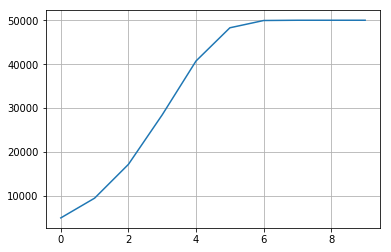

In [40]:

N = 10
b = 50000
dt = 1
k = 1   #Ettersom veksten til bakteriene er lik antallet bakterier, er k = 1


tid = zeros(N)
antall = zeros(N)
derantall = zeros(N)


tid[0]= 0
antall[0]= 5000


for i in range(N-1):
    derantall[i] = (antall[i]*k)*(1-(antall[i]/b))
    antall[i+1] = antall[i]+derantall[i]*dt
    tid[i+1] = tid[i]+dt
    
plot(tid, antall)
grid(True)

## Modell 3: Rovdyr-byttedyr

<img src="https://i.ytimg.com/vi/zNO0kxTClYo/maxresdefault.jpg",width=500,height=500>

Vi trenger to differensiallikninger for å modellere både rovdyr og byttedyr. Størrelsen til de ulike populasjonene, vil påvirke hverandre. En modell for dette er gitt med følgende type differensiallikninger (kalt Lotka-Volterra differensiallikningene):

La B(t) være antall byttedyr etter t tidsenheter og la R(t) være antall rovdyr etter t tidsenheter.

$B'(t) = a\cdot B(t) - b\cdot B(t)R(t)$

$R'(t) = c\cdot B(t)R(t) - d \cdot R(t)$

1\. Hva betyr de ulike leddene i likningene? Hva betyr de ulike koeffisientene?
Det første leddet til B'(t) viser veksten hos B populasjonen. a er her det samme som k var i oppgave 1 og 2, nemlig vekstraten. 
Den andre delen sier noe om nedgangen i B populasjonen. Når populasjon R øker, synker populasjon B. Her står b for hvor ofte rovdyrene møter byttedyrene. 
Første leddet i likning R'(t) viser at jo oftere artene møtes, jo flere er det av hver av dem. koeffisienten c sier igjen noe om hvor ofte byttedyr og rovdyr møttes. 
Andre del av likningen viser nedgangen i rovdyr populasjonen dersom populasjonen blir for stor. Her er d nedgangsraten. 

Vi kan starte med 100 seler og 100 isbjørner på en isolert øy. Vi velger A=0.25, B=0.002, C=0.1 og D=0.001.

2\. Bruk Eulers metode og løs likningene. Plott _B(t)_ og _R(t)_ i samme koordinatsystem. Beskriv sammenhengen med ord.

3\. Endre systematisk på antallet rovdyr og byttedyr. Beskriv hva som skjer.

4\. Endre systematisk på koeffisientene. Beskriv hva som skjer.

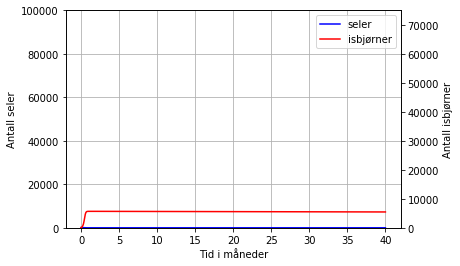

In [103]:
#Koeffisientene og start populasjon
B0 = 100  #antall seler i t = 0
R0 = 100  #antall isbjørner i t = 0
a = 0.25  #vekstraten til seler
b = 0.002 #møte mellom B og R
c = 0.1   #møte mellom B og R 2
d = 0.001 #nedgangsrate for isbjørn

N = 1000   #intervaller   
t = 40
dt = t/(N-1)

#matriser
tid = zeros(N)
isbjørn = zeros(N)
seler = zeros(N)
deris = zeros(N)
derse = zeros(N)


seler[0] = B0
isbjørn[0] = R0


for i in range(N-1):
    derse[i] = a*seler[i]-b*seler[i]*isbjørn[i]
    deris[i] = c*isbjørn[i]*seler[i]-d*isbjørn[i]
    seler[i+1] = seler[i]+derse[i]*dt
    isbjørn[i+1] = isbjørn[i]+deris[i]*dt
    tid[i+1] = tid[i]+dt

    
#plotter
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(tid, seler, '-b', label = 'seler')
ax2 = ax.twinx()
data2 = ax2.plot(tid, isbjørn, '-r', label = 'isbjørner')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc=0)

ax.grid()
ax.set_xlabel("Tid i måneder")
ax.set_ylabel("Antall seler")
ax2.set_ylabel("Antall isbjørner")
ax2.set_ylim(0, 75000)
ax.set_ylim(0, 100000)
plt.show()